# Plantas solares 

# Tabla de contenido
1. [Introducción ](#Introducción)
2. [Objetivo Específico](#Objetivo-Específico)
3. [Etapas del Análisis del proyecto](#Etapas-del-Análisis-del-proyecto)
4. [Preprocesamiento de datos](#Preprocesamiento-de-datos)
5. [Análisis Exploratorio de Datos (EDA)](#Análisis-Exploratorio-de-Datos-(EDA))
6. [Conclusiones y Recomendaciones](#Conclusiones-y-Recomendaciones)

# Introducción

El crecimiento de las energías renovables ha convertido a la energía solar en una de las principales fuentes de generación sostenible. Sin embargo, la eficiencia de los paneles solares está influenciada por múltiples factores ambientales, como la temperatura, la radiación solar y las condiciones climáticas. Este análisis busca explorar y procesar datos de generación de energía para identificar patrones clave, analizar la correlación con variables ambientales y proponer estrategias para mejorar la predicción del rendimiento de los paneles solares.

# Objetivo Específico

Integrar y analizar datos de generación de energía solar para identificar patrones y factores ambientales que influyen en su rendimiento, facilitando así la toma de decisiones para mejorar la eficiencia del sistema.

# Etapas del Análisis del proyecto

**1. Preprocesamiento de Datos**
   
Conversión del formato de fecha y hora.

Manejo de valores nulos y eliminación de duplicados.

Integración de los cuatro conjuntos de datos.

Análisis descriptivo de las variables clave.

**2. Análisis Exploratorio de Datos (EDA)**

Visualización de tendencias y patrones en la generación de energía.

Análisis de correlación entre variables ambientales y rendimiento de los paneles solares.

Identificación de posibles anomalías en la generación de energía.

**3. Conclusiones y Recomendaciones**

Resumen de hallazgos clave.

Recomendaciones para mejorar la predicción de generación de energía.


**Inicialización**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Cargar los datos**

In [2]:
P1_generation = pd.read_csv('Plant_1_Generation_Data.csv')

In [3]:
P1_sensor = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

In [4]:
P2_generation = pd.read_csv('Plant_2_Generation_Data.csv')

In [5]:
P2_sensor = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')

# Preprocesamiento de datos 

In [6]:
P1_generation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [7]:
P1_generation.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15/05/2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15/05/2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15/05/2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15/05/2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15/05/2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [8]:
P1_generation['DATE_TIME'] = pd.to_datetime(P1_generation['DATE_TIME'], format="%d/%m/%Y %H:%M")

In [9]:
P1_generation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    68778 non-null  datetime64[ns]
 1   PLANT_ID     68778 non-null  int64         
 2   SOURCE_KEY   68778 non-null  object        
 3   DC_POWER     68778 non-null  float64       
 4   AC_POWER     68778 non-null  float64       
 5   DAILY_YIELD  68778 non-null  float64       
 6   TOTAL_YIELD  68778 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.7+ MB


In [10]:
P1_generation.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [11]:
P1_generation.duplicated().sum()

0

In [12]:
P1_sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


In [13]:
P1_sensor.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [14]:
P1_sensor['DATE_TIME'] = pd.to_datetime(P1_sensor['DATE_TIME'], format="%Y-%m-%d %H:%M:%S")

In [15]:
P1_sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3182 non-null   datetime64[ns]
 1   PLANT_ID             3182 non-null   int64         
 2   SOURCE_KEY           3182 non-null   object        
 3   AMBIENT_TEMPERATURE  3182 non-null   float64       
 4   MODULE_TEMPERATURE   3182 non-null   float64       
 5   IRRADIATION          3182 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 149.3+ KB


In [16]:
P1_sensor.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [17]:
P1_sensor.duplicated().sum()

0

In [18]:
P2_generation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6   TOTAL_YIELD  67698 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ MB


In [19]:
P2_generation.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15/05/2020 00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,15/05/2020 00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,15/05/2020 00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,15/05/2020 00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,15/05/2020 00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07


In [20]:
P2_generation['DATE_TIME'] = pd.to_datetime(P2_generation['DATE_TIME'], format="%d/%m/%Y %H:%M")

In [21]:
P2_generation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    67698 non-null  datetime64[ns]
 1   PLANT_ID     67698 non-null  int64         
 2   SOURCE_KEY   67698 non-null  object        
 3   DC_POWER     67698 non-null  float64       
 4   AC_POWER     67698 non-null  float64       
 5   DAILY_YIELD  67698 non-null  float64       
 6   TOTAL_YIELD  67698 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.6+ MB


In [22]:
P2_generation.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07


In [23]:
P2_generation.duplicated().sum()

0

In [24]:
P2_sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   PLANT_ID             3259 non-null   int64  
 2   SOURCE_KEY           3259 non-null   object 
 3   AMBIENT_TEMPERATURE  3259 non-null   float64
 4   MODULE_TEMPERATURE   3259 non-null   float64
 5   IRRADIATION          3259 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 152.9+ KB


In [25]:
P2_sensor.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


In [26]:
P2_sensor['DATE_TIME'] = pd.to_datetime(P2_sensor['DATE_TIME'], format="%Y-%m-%d %H:%M:%S")

In [27]:
P2_sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3259 non-null   datetime64[ns]
 1   PLANT_ID             3259 non-null   int64         
 2   SOURCE_KEY           3259 non-null   object        
 3   AMBIENT_TEMPERATURE  3259 non-null   float64       
 4   MODULE_TEMPERATURE   3259 non-null   float64       
 5   IRRADIATION          3259 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 152.9+ KB


In [28]:
P2_sensor.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


In [29]:
P2_sensor.duplicated().sum()

0

**Integración de los cuatro conjuntos de datos**

In [30]:
p1_merged = pd.merge(P1_generation, P1_sensor, on=["DATE_TIME", "PLANT_ID"], how="left")

In [31]:
p2_merged = pd.merge(P2_generation, P2_sensor, on=["DATE_TIME", "PLANT_ID"], how="left")

In [32]:
solar_data = pd.concat([p1_merged, p2_merged], ignore_index=True)

In [33]:
solar_data

,DATE_TIME,PLANT_ID,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
...,...,...,...,...,...,...,...,...,...,...,...
136471,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.0,520758.0,iq8k7ZNt4Mwm3w0,23.202871,22.535908,0.0
136472,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.0,121131356.0,iq8k7ZNt4Mwm3w0,23.202871,22.535908,0.0
136473,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.0,2427691.0,iq8k7ZNt4Mwm3w0,23.202871,22.535908,0.0
136474,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.0,106896394.0,iq8k7ZNt4Mwm3w0,23.202871,22.535908,0.0


In [34]:
print(solar_data.isnull().sum())


DATE_TIME              0
PLANT_ID               0
SOURCE_KEY_x           0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
SOURCE_KEY_y           4
AMBIENT_TEMPERATURE    4
MODULE_TEMPERATURE     4
IRRADIATION            4
dtype: int64


In [35]:
solar_data = solar_data.ffill()

Análisis descriptivo de las variables

In [36]:
solar_data.describe()

,DATE_TIME,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,136476,1.364760e+05,136476.000000,136476.000000,136476.000000,1.364760e+05,136476.000000,136476.000000,136476.000000
mean,2020-06-01 09:23:03.157478144,4.135497e+06,1708.541497,274.803511,3295.433783,3.303821e+08,26.763098,31.921176,0.230778
min,2020-05-15 00:00:00,4.135001e+06,0.000000,0.000000,0.000000,0.000000e+00,20.398505,18.140415,0.000000
25%,2020-05-23 23:00:00,4.135001e+06,0.000000,0.000000,28.321429,6.520020e+06,23.637604,22.411698,0.000000
50%,2020-06-01 18:45:00,4.135001e+06,6.050000,3.506905,2834.803572,7.269333e+06,25.908122,26.413755,0.026213
75%,2020-06-09 21:45:00,4.136001e+06,1155.788333,532.673333,5992.000000,2.826096e+08,29.266583,40.778583,0.442961
max,2020-06-17 23:45:00,4.136001e+06,14471.125000,1410.950000,9873.000000,2.247916e+09,39.181638,66.635953,1.221652
std,NaN,4.999862e+02,3222.181273,380.182569,3035.294425,6.085705e+08,3.897288,11.803769,0.305655


**Distribución de la generación de energía**

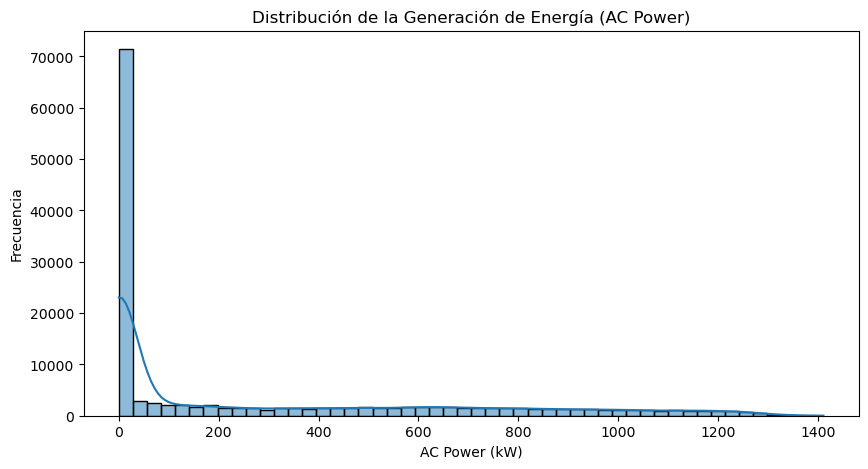

In [37]:
plt.figure(figsize=(10, 5))
sns.histplot(solar_data["AC_POWER"], bins=50, kde=True)
plt.title("Distribución de la Generación de Energía (AC Power)")
plt.xlabel("AC Power (kW)")
plt.ylabel("Frecuencia")
plt.show()

 La gráfica muestra una distribución de frecuencias de la generación de energía. Observamos que:

Alta frecuencia en niveles bajos: Hay una alta frecuencia de generación de energía en el rango de 0 a 200 kW. Esto sugiere que la mayoría de las veces, la generación de energía se encuentra en niveles relativamente bajos.
Disminución exponencial: La frecuencia disminuye rápidamente a medida que aumenta la potencia de CA. Esto indica que es mucho menos común observar niveles de generación de energía más altos.
Cola larga: La gráfica muestra una cola larga hacia la derecha, lo que significa que, aunque es menos frecuente, hay casos de generación de energía significativamente más alta, incluso hasta 1400 kW.
Interpretación: La gráfica sugiere que la generación de energía en el sistema representado es variable, pero tiende a concentrarse en niveles bajos de potencia. Los picos de alta potencia son eventos menos comunes. Esta distribución podría ser característica de un sistema que:

Depende de fuentes intermitentes: Si la generación depende en gran medida de fuentes renovables como en este caso la solar , es probable que haya fluctuaciones en la generación y periodos de baja producción.
Tiene una demanda variable: Si la demanda de energía varía mucho, la generación también tendrá que ajustarse, resultando en una distribución como la que se muestra.

**Correlación entre variables**

Una matriz de correlación es una tabla que muestra los coeficientes de correlación entre múltiples variables. Cada celda de la tabla muestra la correlación entre dos variables específicas. El coeficiente de correlación varía de -1 a 1:

1: Correlación positiva perfecta. Cuando una variable aumenta, la otra también aumenta en la misma proporción.

0: No hay correlación lineal. Las variables no están relacionadas linealmente.

-1: Correlación negativa perfecta. Cuando una variable aumenta, la otra disminuye en la misma proporción.

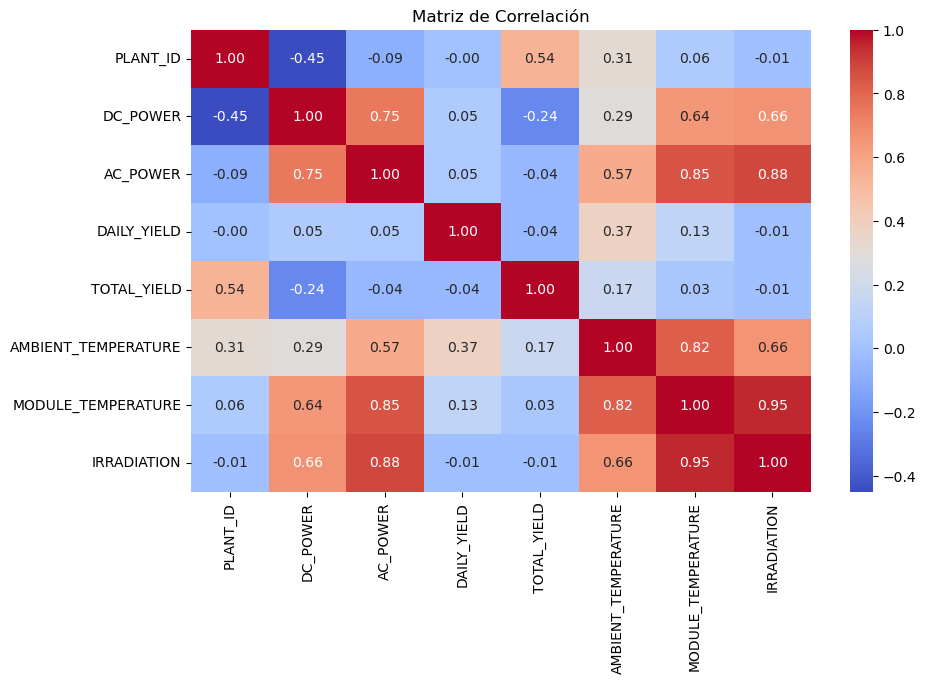

In [38]:
plt.figure(figsize=(10, 6))
numeric_data = solar_data.select_dtypes(include=["number"])
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Matriz de Correlación")
plt.show()

Correlaciones más significativas:

DC_POWER y AC_POWER (0.75): Existe una correlación positiva muy fuerte entre la potencia de CC (corriente continua) y la potencia de CA (corriente alterna). Esto es lógico, ya que la potencia de CC generada por los paneles solares se convierte en potencia de CA para su uso.

AC_POWER e IRRADIATION (0.88): Hay una correlación positiva muy fuerte entre la potencia de CA y la irradiancia. Esto también es esperado, ya que la cantidad de energía solar que llega a los paneles (irradiancia) afecta directamente la cantidad de energía generada.

MODULE_TEMPERATURE e IRRADIATION (0.95): La temperatura del módulo (panel solar) está altamente correlacionada con la irradiancia. Esto es lógico, ya que la radiación solar calienta los paneles.

AMBIENT_TEMPERATURE y MODULE_TEMPERATURE (0.82): La temperatura ambiente también tiene una correlación positiva fuerte con la temperatura del módulo, aunque no tan fuerte como la irradiancia.

DAILY_YIELD y TOTAL_YIELD (0.40): Existe una correlación positiva moderada entre el rendimiento diario y el rendimiento total. Esto sugiere que los días con mayor rendimiento diario tienden a contribuir a un mayor rendimiento total.

# Análisis Exploratorio de Datos (EDA)

**Visualización de tendencias y patrones en la generación de energía.**

In [39]:
daily_generation = solar_data.groupby(solar_data["DATE_TIME"].dt.date)["DAILY_YIELD"].sum()

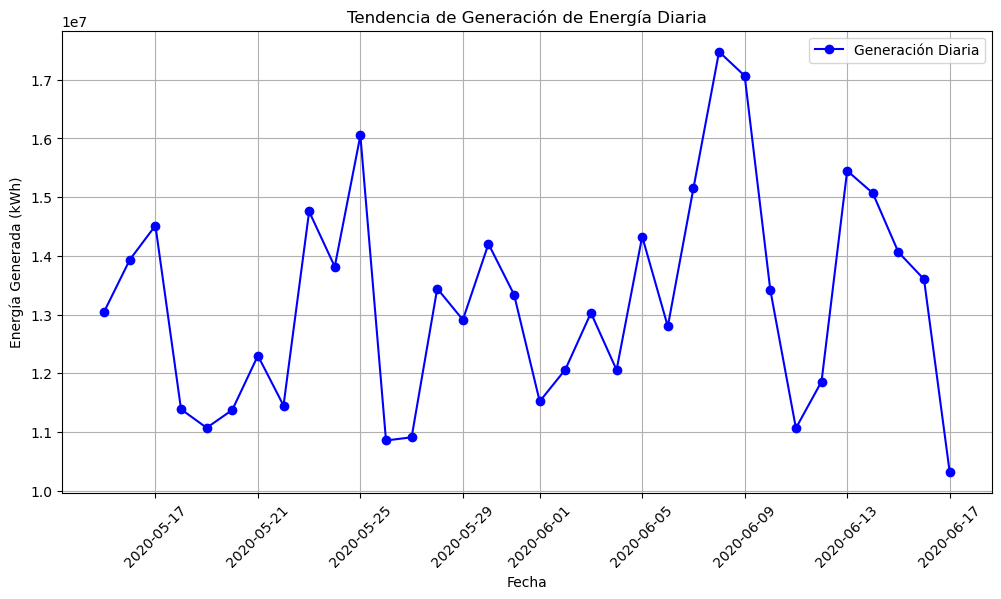

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(daily_generation, marker="o", linestyle="-", color="blue", label="Generación Diaria")
plt.xlabel("Fecha")
plt.ylabel("Energía Generada (kWh)")
plt.title("Tendencia de Generación de Energía Diaria")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

Se pueden observar varios puntos clave:

Fluctuación: La generación de energía varía considerablemente a lo largo del período de tiempo mostrado. Hay picos y valles, lo que indica que la generación no es constante.

Picos: Se observan picos de generación en varios puntos, lo que sugiere días de alta producción de energía.

Valles: También se observan valles, lo que indica días de baja producción de energía.
T
endencia general: No se observa una tendencia clara hacia arriba o hacia abajo en la generación de energía durante este período.

La gráfica sugiere que la generación de energía en el sistema representado es variable y depende de factores que cambian con el tiempo. Esta variabilidad podría ser causada por:

Condiciones climáticas: Si la generación depende de fuentes renovables como la solar, los cambios en la radiación solar o la nubosidad podrían afectar la cantidad de energía generada.

Demanda: Si la generación se ajusta a la demanda, los cambios en el consumo de energía podrían reflejarse en la generación.

Mantenimiento o fallos: Los picos y valles podrían ser causados por actividades de mantenimiento programado o fallos inesperados en el sistema.

**Análisis de correlación entre variables ambientales y rendimiento de los paneles solares.**

In [41]:
numeric_data = solar_data[["DAILY_YIELD", "AMBIENT_TEMPERATURE", "MODULE_TEMPERATURE", "IRRADIATION"]]

In [42]:
corr_matrix = numeric_data.corr()

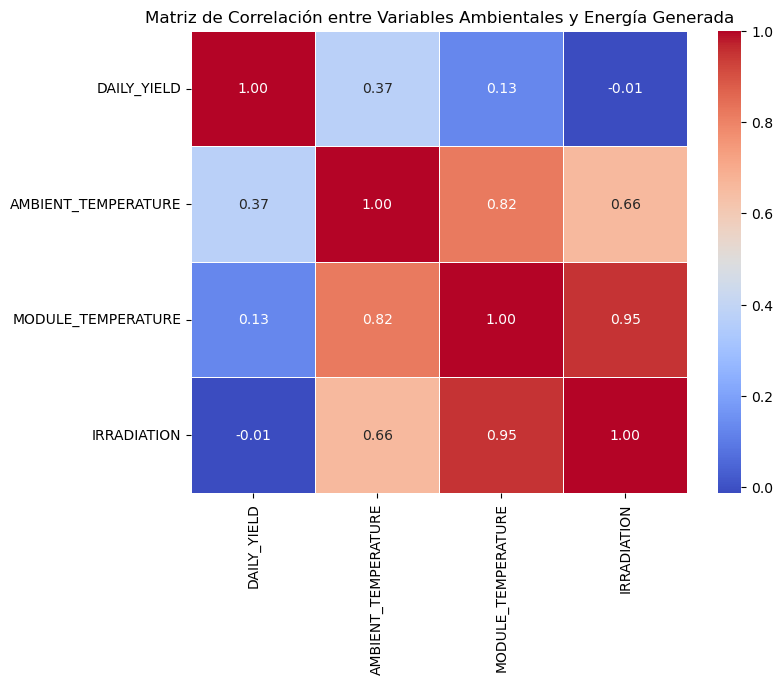

In [43]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables Ambientales y Energía Generada")
plt.show()

Análisis de la matriz:

DAILY_YIELD vs. AMBIENT_TEMPERATURE (0.37): Correlación positiva moderada. Los días más cálidos tienden a tener un mayor rendimiento energético, pero la relación no es muy fuerte.

DAILY_YIELD vs. MODULE_TEMPERATURE (0.13): Correlación positiva débil. La temperatura del módulo tiene una influencia leve en el rendimiento diario, pero otros factores son más importantes.

DAILY_YIELD vs. IRRADIATION (-0.01): Correlación negativa muy débil o nula. No hay una relación lineal clara entre la irradiación y el rendimiento diario en este conjunto de datos.

AMBIENT_TEMPERATURE vs. MODULE_TEMPERATURE (0.82): Correlación positiva fuerte. La temperatura ambiente y la temperatura del módulo están muy relacionadas, lo cual es lógico ya que la radiación solar calienta los paneles.

AMBIENT_TEMPERATURE vs. IRRADIATION (0.66): Correlación positiva fuerte. Los días con mayor irradiación solar también tienden a ser más cálidos.

MODULE_TEMPERATURE vs. IRRADIATION (0.95): Correlación positiva muy fuerte. La irradiación solar es el principal factor que afecta la temperatura del módulo.

La irradiación solar es el factor más importante que afecta la temperatura del módulo. Esto es esperable, ya que la radiación del sol calienta directamente los paneles.

La temperatura ambiente también influye en la temperatura del módulo, aunque en menor medida. Esto sugiere que otros factores como el viento o la humedad también pueden jugar un papel.

El rendimiento diario tiene una relación moderada con la temperatura ambiente y una relación débil con la temperatura del módulo. Esto indica que la generación de energía depende en parte de la temperatura, pero otros factores como la irradiación y la eficiencia del sistema son más importantes.

La falta de correlación entre el rendimiento diario y la irradiación es sorprendente y podría indicar un problema  con el sistema. En teoría, la irradiación debería ser un factor clave en la generación de energía solar.

Posibles explicaciones para la baja correlación entre DAILY_YIELD e IRRADIATION:
Factores no considerados: La matriz no incluye otras variables importantes como la nubosidad, la eficiencia de los paneles o el ángulo de inclinación.

Particularidades del sistema: El sistema podría tener características específicas que hacen que la irradiación no sea un factor determinante en el rendimiento diario.

Identificación de posibles anomalías en la generación de energía.

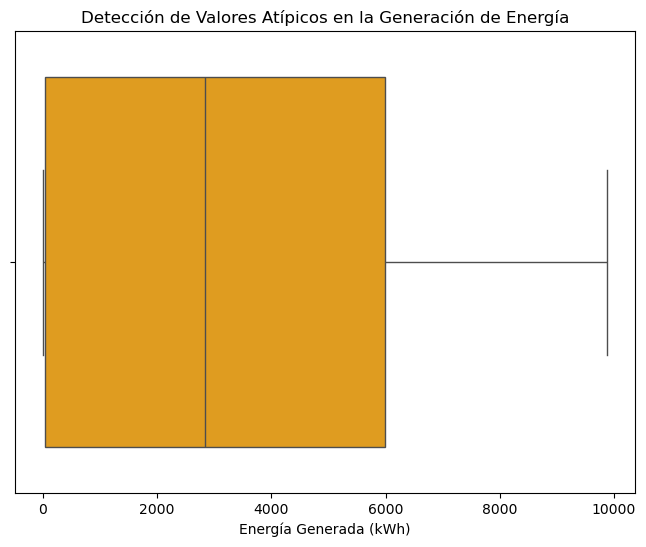

In [44]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=solar_data["DAILY_YIELD"], color="orange")
plt.title("Detección de Valores Atípicos en la Generación de Energía")
plt.xlabel("Energía Generada (kWh)")
plt.show()

Análisis del gráfico:

Rango intercuartílico: La caja muestra que la mayoría de los datos se concentran entre aproximadamente 2000 kWh y 6000 kWh.

Mediana: La línea dentro de la caja indica que la mediana de la generación de energía está alrededor de 4000 kWh.

Valores atípicos: Se observan varios puntos fuera de los bigotes, tanto en el extremo inferior como en el superior. Estos puntos representan valores atípicos, es decir, días en los que la generación de energía fue significativamente más baja o más alta de lo habitual.

El gráfico sugiere que la generación de energía en el sistema representado es variable y presenta valores atípicos. Estos valores atípicos podrían ser causados por:

Condiciones climáticas extremas: Días con condiciones climáticas inusuales, como tormentas o períodos de baja radiación solar, podrían resultar en una generación de energía atípica.

Fallos en el sistema: Problemas técnicos o fallos en los equipos podrían afectar la generación de energía y dar lugar a valores atípicos.

Mantenimiento: Actividades de mantenimiento programado podrían resultar en una disminución temporal de la generación de energía.

# Conclusiones y Recomendaciones


### **Hallazgos Clave**  

1. **Distribución de la Generación de Energía:**  
   - La mayoría de las veces, la generación de energía se encuentra en niveles bajos (0-200 kW).  
   - La frecuencia de generación disminuye exponencialmente a medida que aumenta la potencia de CA.  
   - Existen casos poco frecuentes de generación significativamente alta (hasta 1400 kW).  
   - Esto sugiere que la generación de energía es variable y depende de factores intermitentes como la irradiación solar.  

2. **Correlaciones entre Variables:**  
   - **Alta correlación positiva** entre la irradiancia y la potencia de CA (0.88), lo que confirma que la cantidad de radiación solar influye directamente en la energía generada.  
   - **Relación fuerte** entre la temperatura del módulo y la irradiación (0.95), lo que indica que los paneles solares se calientan con mayor radiación solar.  
   - **Moderada correlación positiva** entre temperatura ambiente y temperatura del módulo (0.82), reflejando el impacto del clima en los paneles.  
   - **Sorprendentemente baja correlación** entre rendimiento diario (DAILY_YIELD) e irradiación (-0.01), lo que sugiere posibles problemas en la medición, eficiencia del sistema o presencia de otros factores no considerados.  

3. **Tendencias y Patrones en la Generación de Energía:**  
   - La producción de energía presenta fluctuaciones significativas, con picos y valles.  
   - No se observa una tendencia clara de crecimiento o disminución de la generación.  
   - Factores como condiciones climáticas, demanda variable y mantenimiento podrían explicar estas variaciones.  

4. **Identificación de Anomalías:**  
   - Se detectaron valores atípicos en la generación de energía, con días de producción significativamente alta o baja.  
   - Posibles causas incluyen condiciones climáticas extremas, fallos en el sistema o mantenimiento programado.  

---

### **Recomendaciones para Mejorar la Predicción de Generación de Energía**  

1. **Optimizar Modelos de Predicción:**  
   - Incluir más variables como nubosidad, velocidad del viento y humedad para mejorar la precisión de los modelos.  
   - Utilizar técnicas avanzadas de machine learning para ajustar predicciones considerando la variabilidad observada.  

2. **Mejorar la Calidad de los Datos:**  
   - Verificar la calibración de sensores de irradiación para entender mejor la baja correlación con el rendimiento diario.  
   - Implementar mecanismos de detección y corrección de anomalías en tiempo real para mejorar la confiabilidad del sistema.  

3. **Análisis de Eficiencia del Sistema:**  
   - Investigar si hay pérdidas de eficiencia en los paneles solares que puedan explicar la baja correlación entre irradiación y rendimiento diario.  
   - Evaluar el impacto del ángulo de inclinación y la limpieza de los paneles en la generación de energía.  

4. **Gestión de Variabilidad y Anomalías:**  
   - Implementar estrategias de almacenamiento de energía para mitigar la variabilidad en la generación.  
   - Diseñar alertas tempranas para identificar posibles fallos o disminuciones inesperadas en la producción.  

